# Imports

In [38]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

df = pd.read_csv("King_County_House_prices_dataset.csv")

# Data Overview

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1,1180,5650,1,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2,2570,7242,2,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1,770,10000,1,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3,1960,5000,1,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2,1680,8080,1,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
#Columns in the dataset
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
df.shape

(21597, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#Looking for missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(50)

,Total,Percent
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917
sqft_lot15,0,0.000000
date,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000


In [18]:
#Statistical Overview
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,1.75,2080.32,15099.41,1.45,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.73,918.11,41412.64,0.55,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.00,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.00,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.00,1910.00,7618.00,1.00,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.00,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.00,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


# Data Cleaning

In [3]:
#float to int
df.price = df.price.astype(int)
df.bathrooms = df.bathrooms.astype(int)
df.floors = df.floors.astype(int)

In [4]:
#Convert date to pandas date format 
df['date'] = pd.to_datetime(df['date'])

#Only Month & Year 
df["date"] = pd.to_datetime(df["date"]).apply(lambda x: x.strftime('%Y-%m'))

# Exploratory Data Analysis

### Exploration & Visualizations**

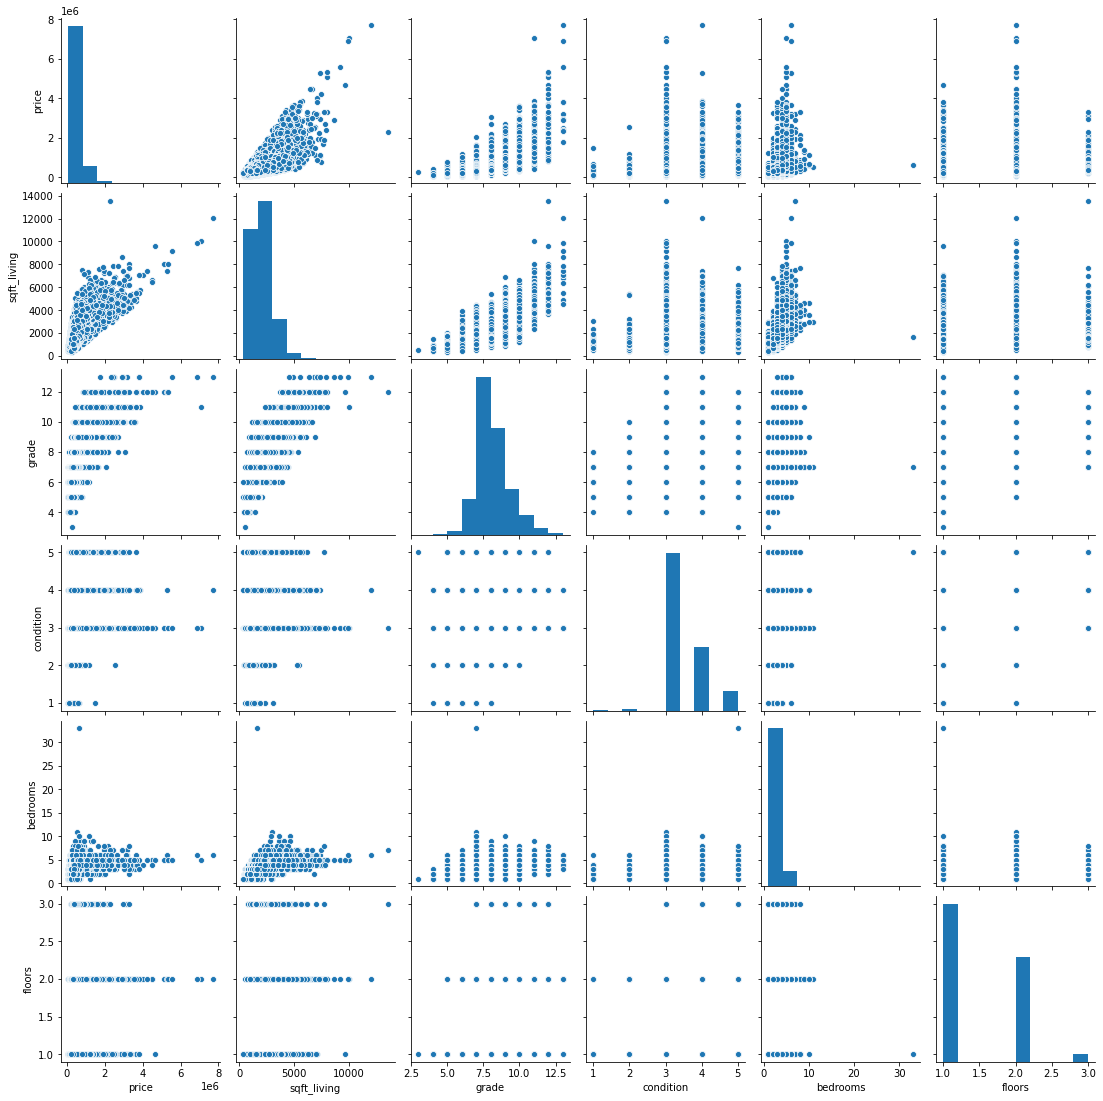

In [19]:
sns.pairplot(df[["price", "sqft_living", "grade", "condition", "bedrooms", "floors"]]);

**Renovated Houses**

In [5]:
df.query("yr_renovated > 0.0")["yr_renovated"].count()

744

In [8]:
744 / 21596 * 100
#(3.5%) houses were renovate

3.445082422670865

In [7]:
ren_yes = df.query("yr_renovated > 0.0")
ren_yes.describe().round(2)
#Average value of renovated houses is higher than the average mean -> 200k ca

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,7.440000e+02,744.00,744.00,744.00,744.00,744.00,744.00,652.00,743.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00
mean,4.418716e+09,768901.89,3.46,1.97,2327.38,16215.53,1.42,0.04,0.60,3.22,7.75,1878.72,1939.46,1995.93,98095.62,47.58,-122.26,1988.88,13390.77
std,2.908265e+09,627125.79,1.07,0.89,1089.00,38235.31,0.51,0.21,1.21,0.52,1.20,849.44,22.09,15.60,54.86,0.12,0.13,715.44,26213.65
min,3.600057e+06,110000.00,1.00,0.00,520.00,1024.00,1.00,0.00,0.00,1.00,4.00,520.00,1900.00,1934.00,98001.00,47.20,-122.50,828.00,1281.00
25%,1.922985e+09,412250.00,3.00,1.00,1560.00,5000.00,1.00,0.00,0.00,3.00,7.00,1267.50,1921.00,1987.00,98040.00,47.52,-122.36,1460.00,5000.00
50%,3.899100e+09,607502.00,3.00,2.00,2200.00,7375.00,1.00,0.00,0.00,3.00,8.00,1730.00,1941.50,2000.00,98112.00,47.60,-122.29,1850.00,7455.00
75%,7.014200e+09,900000.00,4.00,2.00,2872.50,12670.75,2.00,0.00,0.00,3.00,8.00,2300.00,1955.00,2007.25,98126.00,47.67,-122.21,2380.00,10925.75
max,9.829200e+09,7700000.00,11.00,8.00,12050.00,478288.00,3.00,1.00,4.00,5.00,13.00,8570.00,2003.00,2015.00,98199.00,47.78,-121.36,5500.00,310582.00


**Date & Time period**

In [9]:
df.date.min()

'2014-05'

In [10]:
df.date.max()

'2015-05'

In [11]:
df.yr_built.min()

1900

In [12]:
df.yr_built.max()

2015

**Price**

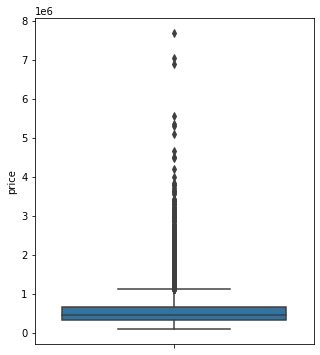

In [15]:
plt.figure(figsize=(5,6))
sns.boxplot(y = df['price'])
            #, y = df['price'])

plt.show()

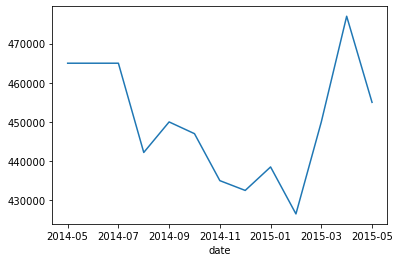

In [16]:
#Median Price per month 
median_price = df.groupby("date")["price"].median()

median_price.plot(kind="line");


In [17]:
#fluctuation
median_price.max() - median_price.min()

50500

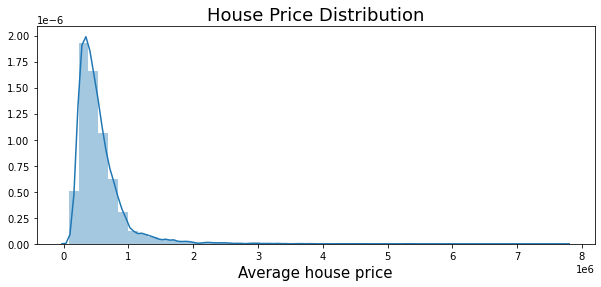

In [18]:
plt.figure(figsize=(10,4))
plt.title("House Price Distribution", size=18)
sns.distplot(df["price"])

plt.xlabel('Average house price', size=15)
plt.show()

**Number of floors & bedrooms**

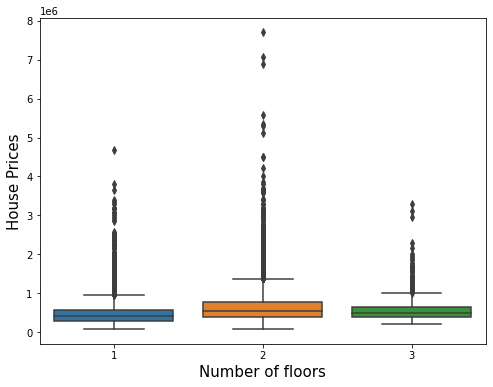

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['floors'], y = df['price'])
plt.xlabel('Number of floors', fontsize = 15)
plt.ylabel('House Prices', fontsize =15)

plt.show()

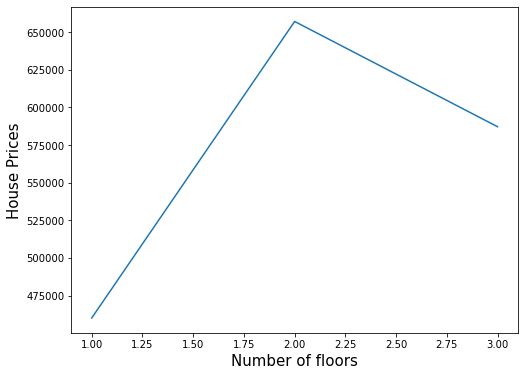

In [21]:
plt.figure(figsize=(8,6))
sns.lineplot(x = df['floors'], y = df['price'], ci=None)
plt.xlabel('Number of floors', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.show()

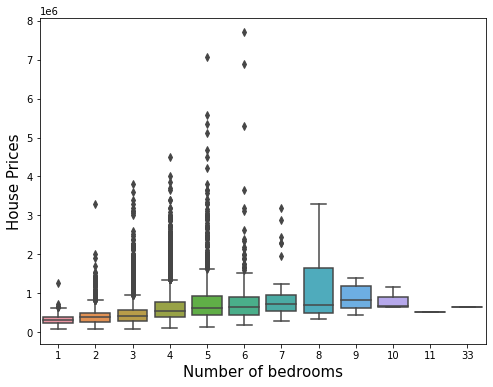

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['bedrooms'], y = df['price'])
plt.xlabel('Number of bedrooms', fontsize = 15)
plt.ylabel('House Prices', fontsize =15)

plt.show()

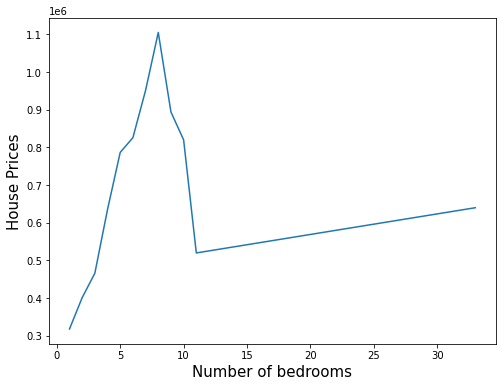

In [23]:
plt.figure(figsize=(8,6))
sns.lineplot(x = df['bedrooms'], y = df['price'], ci=None)
plt.xlabel('Number of bedrooms', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.show()

**Sqft Living**

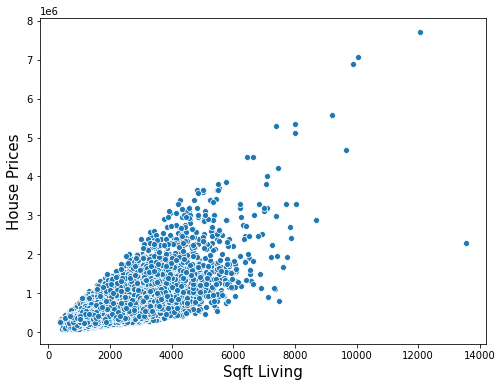

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['sqft_living'], y = df['price'])
plt.xlabel('Sqft Living', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.show()

**Grade** 

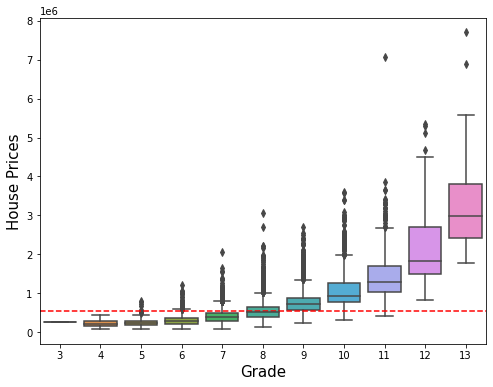

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['grade'], y = df['price'])
plt.xlabel('Grade', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.axhline(df.price.mean(), ls='--', color="r")

plt.show()

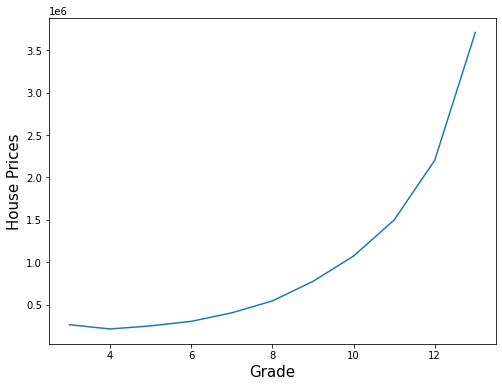

In [26]:
plt.figure(figsize=(8,6))
sns.lineplot(x = df['grade'], y = df['price'], ci=None)
plt.xlabel('Grade', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.show()

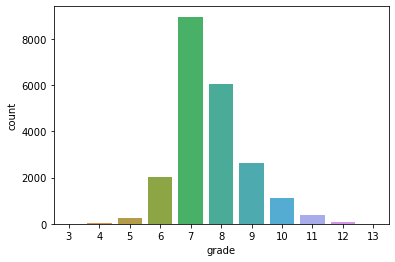

In [27]:
sns.countplot(x="grade", data=df);

**Condition**

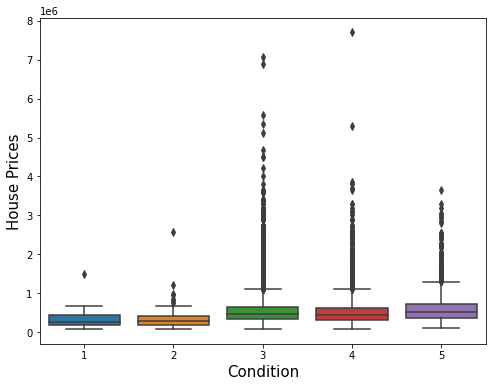

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['condition'], y = df['price'])
plt.xlabel('Condition', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.show()

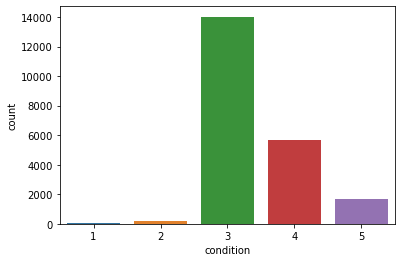

In [29]:
sns.countplot(x="condition", data=df);

**Year Built**

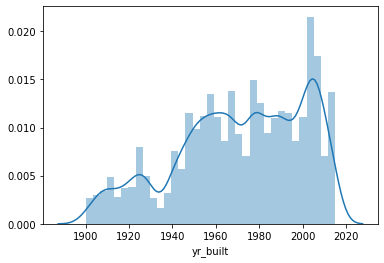

In [30]:
sns.distplot(df.yr_built); 

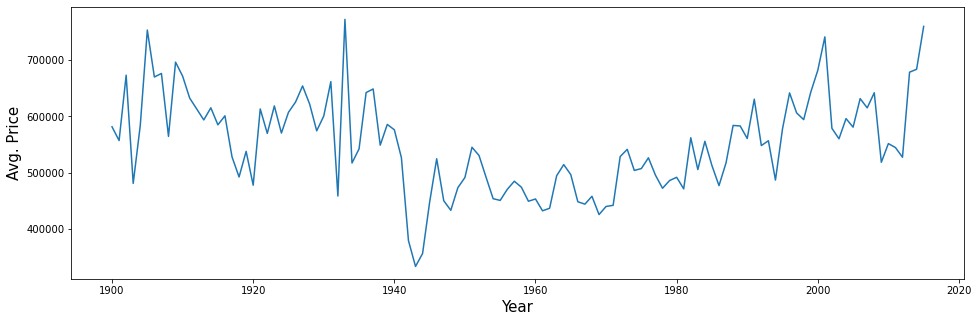

In [31]:
plt.figure(figsize=(16,5))

sns.lineplot(x='yr_built', y='price', data=df, ci=None)

plt.ylabel('Avg. Price', size=15)
plt.xlabel('Year', size=15)

plt.show()

In [36]:
#How many houses were renovated after 1940? Why are they worth more?
df[(df.yr_renovated > 0) & (df.yr_renovated < 1940)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13723,4475800065,2014-06,459950,3,1,1850,6869,1,0.0,2.0,...,6,1100,750.0,1919,1934.0,98166,47.4648,-122.363,1850,10096


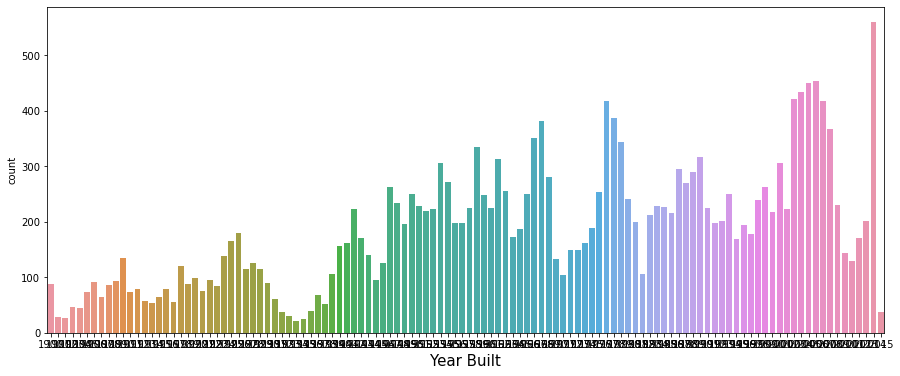

In [34]:
plt.figure(figsize=(15,6))

sns.countplot(x="yr_built", data=df)#, ci=None)
plt.xlabel('Year Built', size=15)

plt.show()

**Map**

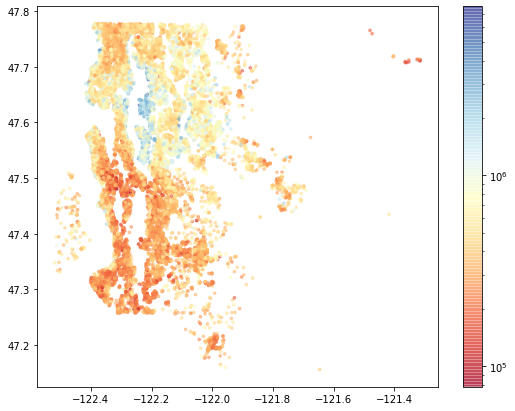

In [39]:
cm = plt.cm.get_cmap('RdYlBu')
x = df.long.values
y = df.lat.values
z = df.price.values

plt.figure(figsize=(9,7))
map_kc = plt.scatter(x, y, c=z, cmap=cm, zorder=1, alpha= 0.5, s=7, norm=matplotlib.colors.LogNorm());
plt.colorbar(map_kc);

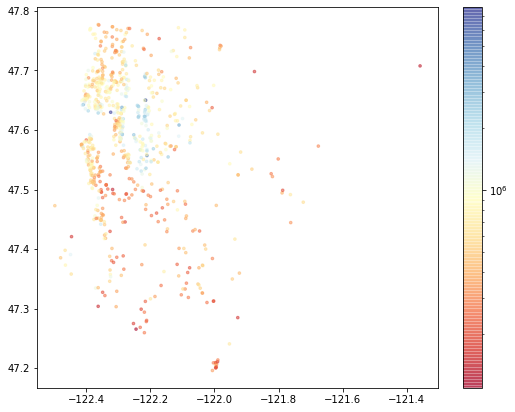

In [40]:
#Show just the renovated houses 
cm = plt.cm.get_cmap('RdYlBu')
x = ren_yes.long.values
y = ren_yes.lat.values
z = ren_yes.price.values

plt.figure(figsize=(9,7))
map_kc = plt.scatter(x, y, c=z, cmap=cm, zorder=1, alpha= 0.5, s=7, norm=matplotlib.colors.LogNorm());
plt.colorbar(map_kc);

### Correlations

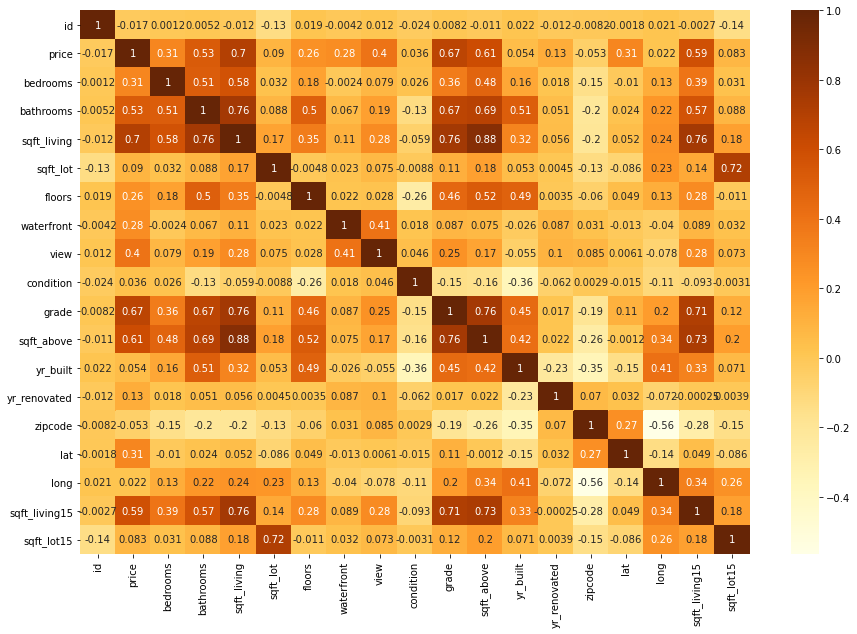

In [41]:
corr = df.corr()

plt.figure(figsize=(15,10))
heatmap = sns.heatmap(corr, cmap='YlOrBr', annot=True)

1. Continuous: sqft_living, sqft_lot, age, renovation

2. Categorical: Bedrooms, Bathrooms, Waterfront, view, condition, grade, floors

3. Nominal: Zip code, lat, long

In [42]:
corr_list = df.corr()['price'].sort_values(ascending=False).round(3)
corr_list

price            1.000
sqft_living      0.702
grade            0.668
sqft_above       0.605
sqft_living15    0.585
bathrooms        0.526
view             0.396
bedrooms         0.309
lat              0.307
waterfront       0.276
floors           0.257
yr_renovated     0.130
sqft_lot         0.090
sqft_lot15       0.083
yr_built         0.054
condition        0.036
long             0.022
id              -0.017
zipcode         -0.053
Name: price, dtype: float64

# Data Preparation

Prepare Data for the Linear Regression 

**Remove Outliers**

In [44]:
#Create a second dataframe and remove the lowest & highest 2.5% from price & sqft_living
df1 = df

In [50]:
round(21597*0.025)

540

In [46]:
df1.sqft_living.sort_values()[0:540]

15367    370
860      380
21316    390
8614     410
11488    420
        ... 
9462     820
15443    820
16815    820
9823     820
1042     820
Name: sqft_living, Length: 540, dtype: int64

In [47]:
df1.sqft_living.sort_values()[-540:]

17177     4270
3382      4270
7193      4270
7397      4280
15190     4280
         ...  
8085      9640
9245      9890
3910     10040
7245     12050
12764    13540
Name: sqft_living, Length: 540, dtype: int64

In [48]:
df1.price.sort_values()[0:540]

15279     78000.0
465       80000.0
16184     81000.0
8267      82000.0
2139      82500.0
           ...   
602      185000.0
10397    185000.0
10308    185000.0
15969    185000.0
17945    185000.0
Name: price, Length: 540, dtype: float64

In [49]:
df1.price.sort_values()[-540:]

4739     1490000.0
509      1490000.0
16204    1490000.0
6946     1490000.0
20807    1490000.0
           ...    
1446     5350000.0
4407     5570000.0
9245     6890000.0
3910     7060000.0
7245     7700000.0
Name: price, Length: 540, dtype: float64

In [51]:
#remove top & low 2.5%

df1 = df[df.price < 937000] 
df1 = df1[df.price > 232500]
df1 = df1[df1.sqft_living < 3400] 
df1 = df1[df1.sqft_living > 1040]

<ipython-input-51-c1a4a14c9e24>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df.price > 232500]


In [53]:
df1.shape
#lost about 5k entries

(16056, 21)

In [54]:
df1.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.605600e+04,16056.00,16056.00,16056.00,16056.00,16056.00,16056.00,14280.00,16007.00,16056.00,16056.00,16056.00,16056.00,13242.00,16056.00,16056.00,16056.00,16056.00,16056.00
mean,4.640050e+09,480997.61,3.40,2.12,1997.19,13955.33,1.51,0.00,0.16,3.41,7.58,1715.79,1972.90,72.80,98077.27,47.57,-122.21,1935.60,12144.77
std,2.890218e+09,168622.99,0.84,0.61,573.08,36884.18,0.54,0.05,0.61,0.64,0.86,598.55,28.77,374.19,52.04,0.14,0.14,527.27,25414.22
min,1.000102e+06,232603.00,1.00,0.50,1050.00,520.00,1.00,0.00,0.00,1.00,5.00,560.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.171400e+09,342000.00,3.00,1.75,1530.00,5000.00,1.00,0.00,0.00,3.00,7.00,1260.00,1955.00,0.00,98033.00,47.47,-122.33,1539.25,5000.00
50%,3.958150e+09,450000.00,3.00,2.25,1930.00,7449.00,1.50,0.00,0.00,3.00,7.00,1570.00,1977.00,0.00,98065.00,47.58,-122.22,1850.00,7500.00
75%,7.399301e+09,594000.00,4.00,2.50,2400.00,10200.00,2.00,0.00,0.00,4.00,8.00,2090.00,1998.00,0.00,98117.00,47.68,-122.12,2270.00,9775.00
max,9.900000e+09,936000.00,33.00,5.25,3390.00,1651359.00,3.50,1.00,4.00,5.00,11.00,3390.00,2015.00,2015.00,98199.00,47.78,-121.32,4610.00,560617.00


**Dummy Variables**

In [55]:
#Normal Dataset
X_dum_g = pd.get_dummies(df["grade"]) #waterfront, view
X_dum_c = pd.get_dummies(df["condition"])
X_dum_z = pd.get_dummies(df["zipcode"])

#Without Outliers
X_dum_g1 = pd.get_dummies(df1["grade"]) #waterfront, view
X_dum_c1 = pd.get_dummies(df1["condition"])
X_dum_z1 = pd.get_dummies(df1["zipcode"])

In [56]:
joined_df_dum = pd.concat([df["sqft_living"], X_dum_g, X_dum_c, X_dum_z], axis=1)
joined_df_dum1 = pd.concat([df1["sqft_living"], X_dum_g1, X_dum_c1, X_dum_z1], axis=1)


# Linear Regression

I have performed Linear Regression twice. 
Once with the present dataset and once with the adapted dataset without outlier.

Due to the previous visualizations and correlations I decided to use the following attributes for linear regression.
* sqft_living
* grade
* condition
* zipcode

In [57]:
#Normal Dataset
X = joined_df_dum
y = df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#Without Outliers 
X1 = joined_df_dum1
y1 = df1[["price"]]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

### Normal Dataset

In [58]:
model_MLR = LinearRegression()
model_MLR.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [59]:
yhat_pred_MLR = model_MLR.predict(X_test)

In [60]:
cross_val_MLR = round(np.mean(cross_val_score(model_MLR,X_train,y_train)),4)
R2_MLR = round(r2_score(y_test, yhat_pred_MLR),4)
MAE_MLR = int(mean_absolute_error(y_test,yhat_pred_MLR))

y_test, yhat_pred_MLR = np.array(y_test), np.array(yhat_pred_MLR)
MAPE_MLR = np.mean(np.abs((y_test - yhat_pred_MLR) / y_test)) * 100

print("R-squared:",R2_MLR)
print("MAE:",MAE_MLR)
print("MAPE:",round(MAPE_MLR))

R-squared: 0.7732
MAE: 97090
MAPE: 18.0


### Dataset without Outliers

In [ ]:
model_MLR = LinearRegression()
model_MLR.fit(X1_train, y1_train)
LinearRegression()

In [ ]:
y1hat_pred_MLR = model_MLR.predict(X1_test)

In [ ]:
cross_val_MLR = round(np.mean(cross_val_score(model_MLR,X1_train,y1_train)),4)
R2_MLR = round(r2_score(y1_test, y1hat_pred_MLR),4)
MAE_MLR = int(mean_absolute_error(y1_test,y1hat_pred_MLR))

y1_test, y1hat_pred_MLR = np.array(y1_test), np.array(y1hat_pred_MLR)
MAPE_MLR = np.mean(np.abs((y1_test - y1hat_pred_MLR) / y1_test)) * 100

print("R-squared:",R2_MLR)
print("MAE:",MAE_MLR)
print("MAPE:",round(MAPE_MLR))